In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_57957_R')

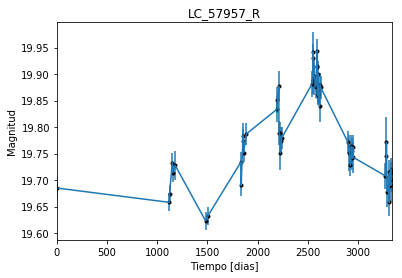

In [2]:
data = np.genfromtxt('LC_57957_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_57957_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

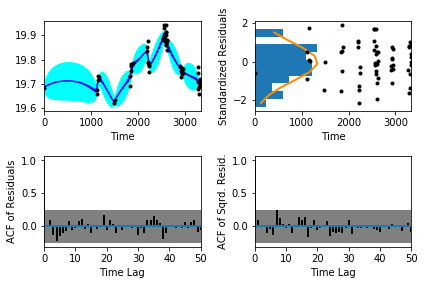

In [5]:
sample.assess_fit()

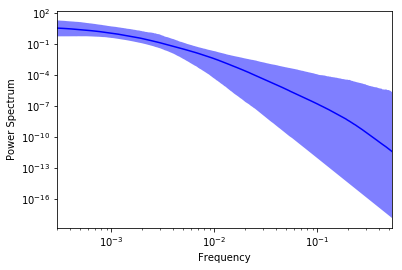

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_57957_R')

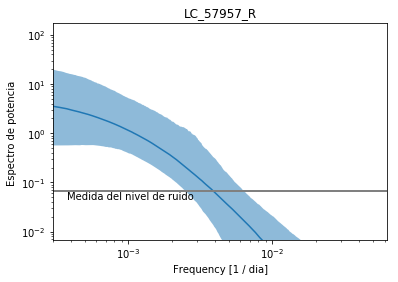

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_57957_R')

Text(0.5,1,'Prediccion , valor esperado LC_57957_R')

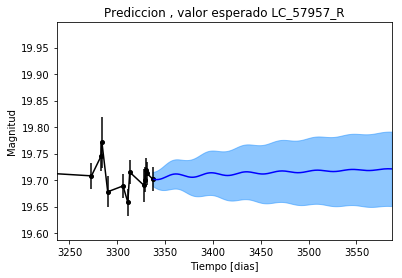

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_57957_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_57957_R')

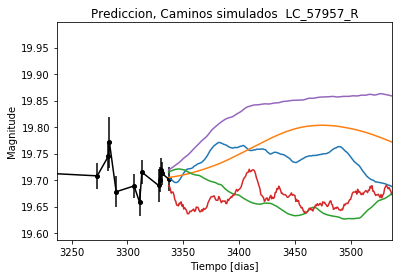

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_57957_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_57957_R')

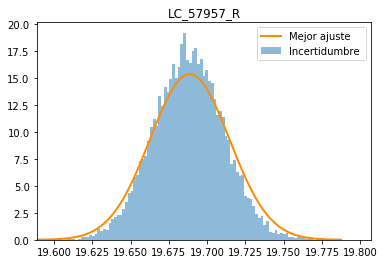

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_57957_R')

Text(0.5,1,'Interpolacion, camino simulado LC_57957_R')

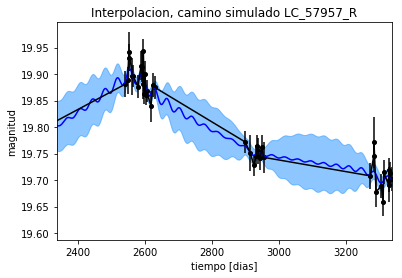

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_57957_R')

Text(0.5,1,'Interpolacion, camino simulado LC_57957_R')

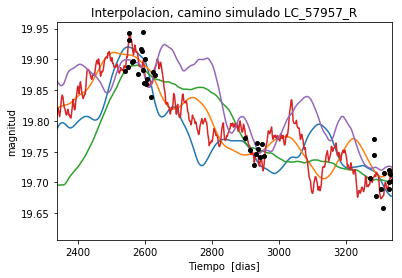

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_57957_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 909.824630474
Median: 0.018711178496
Standard deviation: 0.206764596308
68% credibility interval: [ 0.00136698  0.2512175 ]
95% credibility interval: [  4.11244052e-04   7.97706880e-01]
99% credibility interval: [  3.30297200e-04   9.96151981e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 483.427438484
Median: 0.00315744096472
Standard deviation: 0.0927601666707
68% credibility interval: [ 0.00060408  0.04313885]
95% credibility interval: [ 0.00033811  0.29775885]
99% credibility interval: [  3.06079298e-04   6.46797032e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 462.966723246
Median: 0.0320393825841
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1938.26002802
Median: 147.972350933
Standard deviation: 1.660855373
68% credibility interval: [ 146.02086562  149.07784426]
95% credibility interval: [ 143.41714193  149.65334289]
99% credibility interval: [ 141.28002936  149.8536238 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 686.555536807
Median: 0.918373639168
Standard deviation: 2.27191667596
68% credibility interval: [ 0.08830044  4.176404  ]
95% credibility interval: [ 0.01949906  7.82181459]
99% credibility interval: [  0.0119602   10.53913945]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 399.50864805
Median: 0.878771300738
Standard deviation: 10.5048398723
68% credibility interval: [  0.02737564  12.07780354]
95% credibility interval: [  1.45933520

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 2.41371771133e-52
Standard deviation: 1.13364192779e+34
68% credibility interval: [  4.62617162e-78   4.17067984e-20]
95% credibility interval: [  1.21297344e-100   6.69830441e-005]
99% credibility interval: [  4.66387648e-105   1.15219782e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2145.74807325
Median: 19.7330702269
Standard deviation: 0.0473933590982
68% credibility interval: [ 19.69133778  19.77178281]
95% credibility interval: [ 19.63321902  19.8181922 ]
99% credibility interval: [ 19.56456806  19.86947633]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 326.588156924
Median: 0.0089858798634
Standard deviation: 0.275123866286
68% credibility interval: [ 0.          0.45316734]
95% credibility interval: [ 0.         0.9426479]
99% credibility interval: [ 0.          1.03272889]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 326.588156924
Median: 0.0089858798634
Standard deviation: 0.275123866286
68% credibility interval: [ 0.          0.45316734]
95% credibility interval: [ 0.         0.9426479]
99% credibility interval: [ 0.          1.03272889]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 660.655420449
Median: 0.0
Standard deviation: 0.000520257450132
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1938.26002802
Median: 147.972350933
Standard deviation: 1.660855373
68% credibility interval: [ 146.02086562  149.07784426]
95% credibility interval: [ 143.41714193  149.65334289]
99% credibility interval: [ 141.28002936  149.8536238 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1705.85389588
Median: 0.00837708522646
Standard deviation: 0.0114125940542
68% credibility interval: [ 0.00494213  0.0152442 ]
95% credibility interval: [ 0.00320487  0.03526299]
99% credibility interval: [ 0.00253557  0.07329961]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2890.61886127
Median: 1.00397283855
Standard deviation: 0.159445869045
68% credibility interval: [ 0.86575096  1.16881116]
95% credibility interval: [ 0.74501779  1.37383252]
99% credibility interval: [ 0.6861488   1.52299903]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 682.504251921
Median: 0.00028355033763
Standard deviation: 0.101777455213
68% credibility interval: [  4.63337606e-06   7.25121032e-03]
95% credibility interval: [  1.25784540e-07   2.03910278e-01]
99% credibility interval: [  2.64218391e-08   7.65605425e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 909.824630474
Median: (-0.117565801806-3.45328196717j)
Standard deviation: 2.16240859048
68% credibility interval: [-1.57844608+0.j         -0.00858899-4.80564164j]
95% credibility interval: [ -5.01214015e+00+0.j          -2.58392259e-03-4.88193701j]
99% credibility interval: [ -6.25900749e+00+0.j          -2.07531852e-03-0.01647186j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 483.427438484
Median: (-0.0198387866778+0.0539899188494j)
Standard deviation: 1.82426299467
68% credibility interval: [-0.27104938+3.41324024j -0.00379552+4.69499807j]
95% credibility interval: [-1.87087405+6.22842247j -0.00212443+1.43323428j]
99% credibility interval: [ -4.06394561e+00+1.92872515j  -1.92315295e-03+0.01647902j]
Posterior sum